<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.562478,32.383368,-1.178570,103.767276,104.862859,-1.095583
1,0.0,1.0,59.143283,48.713902,-0.131610,117.725575,117.895421,-0.169846
2,0.0,2.0,61.250177,46.097983,-1.077636,116.270524,117.306442,-1.035918
3,0.0,3.0,46.544780,56.397430,1.329542,114.271753,113.464167,0.807586
4,0.0,4.0,20.652868,39.097607,2.609728,72.360203,71.289913,1.070290
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.617262,50.547258,2.093808,148.258328,145.547287,2.711041
59996,999.0,56.0,58.514420,99.532950,-3.430654,164.616716,167.548180,-2.931464
59997,999.0,57.0,89.293568,23.878097,-2.409381,120.762284,122.594035,-1.831750
59998,999.0,58.0,72.153511,43.788278,-1.281635,124.660154,125.469551,-0.809397


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.562478,32.383368,-1.178570,103.767276,104.862859,-1.095583
1,0.0,1.0,59.143283,48.713902,-0.131610,117.725575,117.895421,-0.169846
2,0.0,2.0,61.250177,46.097983,-1.077636,116.270524,117.306442,-1.035918
3,0.0,3.0,46.544780,56.397430,1.329542,114.271753,113.464167,0.807586
4,0.0,4.0,20.652868,39.097607,2.609728,72.360203,71.289913,1.070290
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.617262,50.547258,2.093808,148.258328,145.547287,2.711041
59996,999.0,56.0,58.514420,99.532950,-3.430654,164.616716,167.548180,-2.931464
59997,999.0,57.0,89.293568,23.878097,-2.409381,120.762284,122.594035,-1.831750
59998,999.0,58.0,72.153511,43.788278,-1.281635,124.660154,125.469551,-0.809397


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.562478  32.383368 -1.178570  103.767276  104.862859 -1.095583
      1.0    59.143283  48.713902 -0.131610  117.725575  117.895421 -0.169846
      2.0    61.250177  46.097983 -1.077636  116.270524  117.306442 -1.035918
      3.0    46.544780  56.397430  1.329542  114.271753  113.464167  0.807586
      4.0    20.652868  39.097607  2.609728   72.360203   71.289913  1.070290
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.617262  50.547258  2.093808  148.258328  145.547287  2.711041
      56.0   58.514420  99.532950 -3.430654  164.616716  167.548180 -2.931464
      57.0   89.293568  23.878097 -2.409381  120.762284  122.594035 -1.831750
      58.0   72.153511  43.788278 -1.281635  124.660154  125.469551 -0.809397
      59.0   54.260931  83.101637 -0.767324  146.595244  146.948890 -0.353646

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.562478  32.383368 -1.178570  103.767276  104.862859 -1.095583
      1.0    59.143283  48.713902 -0.131610  117.725575  117.895421 -0.169846
      2.0    61.250177  46.097983 -1.077636  116.270524  117.306442 -1.035918
      3.0    46.544780  56.397430  1.329542  114.271753  113.464167  0.807586
      4.0    20.652868  39.097607  2.609728   72.360203   71.289913  1.070290
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.617262  50.547258  2.093808  148.258328  145.547287  2.711041
      56.0   58.514420  99.532950 -3.430654  164.616716  167.548180 -2.931464
      57.0   89.293568  23.878097 -2.409381  120.762284  122.594035 -1.831750
      58.0   72.153511  43.788278 -1.281635  124.660154  125.469551 -0.809397
      59.0   54.260931  83.101637 -0.767324  146.595244  146.948890 -0.353646

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,62.562478,32.383368,-1.178570,103.767276,104.862859,-1.095583
1,0.0,1.0,59.143283,48.713902,-0.131610,117.725575,117.895421,-0.169846
2,0.0,2.0,61.250177,46.097983,-1.077636,116.270524,117.306442,-1.035918
3,0.0,3.0,46.544780,56.397430,1.329542,114.271753,113.464167,0.807586
4,0.0,4.0,20.652868,39.097607,2.609728,72.360203,71.289913,1.070290
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,85.617262,50.547258,2.093808,148.258328,145.547287,2.711041
59996,999.0,56.0,58.514420,99.532950,-3.430654,164.616716,167.548180,-2.931464
59997,999.0,57.0,89.293568,23.878097,-2.409381,120.762284,122.594035,-1.831750
59998,999.0,58.0,72.153511,43.788278,-1.281635,124.660154,125.469551,-0.809397


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    62.562478  32.383368 -1.178570  103.767276  104.862859 -1.095583
      1.0    59.143283  48.713902 -0.131610  117.725575  117.895421 -0.169846
      2.0    61.250177  46.097983 -1.077636  116.270524  117.306442 -1.035918
      3.0    46.544780  56.397430  1.329542  114.271753  113.464167  0.807586
      4.0    20.652868  39.097607  2.609728   72.360203   71.289913  1.070290
...                ...        ...       ...         ...         ...       ...
999.0 55.0   85.617262  50.547258  2.093808  148.258328  145.547287  2.711041
      56.0   58.514420  99.532950 -3.430654  164.616716  167.548180 -2.931464
      57.0   89.293568  23.878097 -2.409381  120.762284  122.594035 -1.831750
      58.0   72.153511  43.788278 -1.281635  124.660154  125.469551 -0.809397
      59.0   54.260931  83.101637 -0.767324  146.595244  146.948890 -0.353646

[60000 rows x 6 columns]

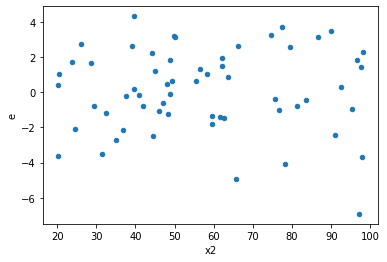

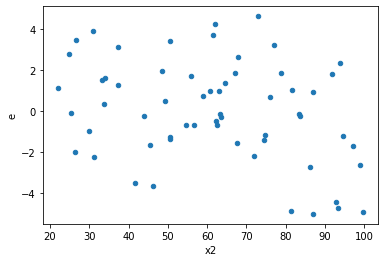

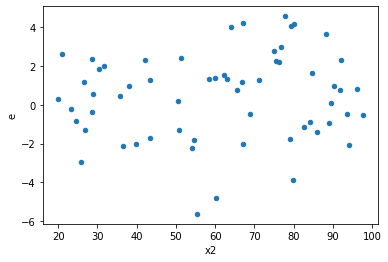

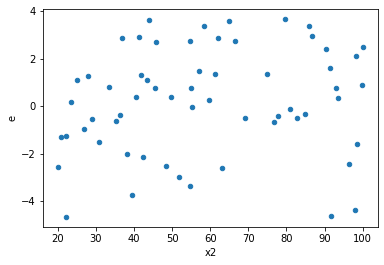

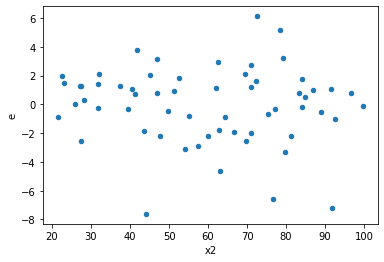

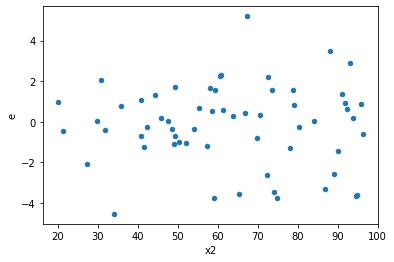

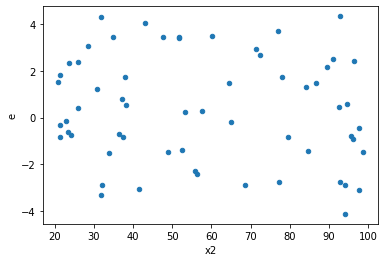

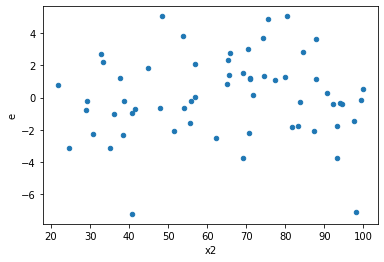

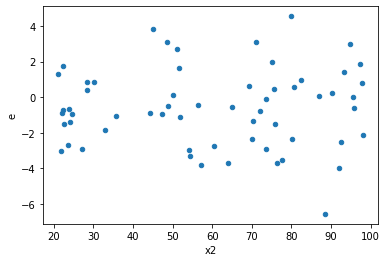

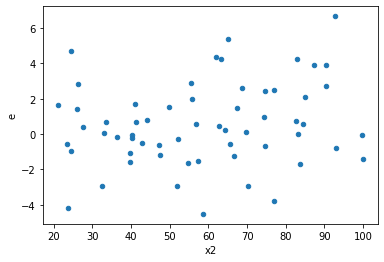

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,85.31575391405765,126.18907936767629,3.877988814275348,5.735867243985286,1.479082977978395,0.36559316078607407,0.817203419606963,0.18279658039303703,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,105.28748043147301,151.2536427127656,4.785794565066955,6.875165577852982,1.4365776642476495,0.4021802031435804,0.7989098984282098,0.2010901015717902,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,58.485974268905025,101.40865603198402,2.6584533758593194,4.609484365090183,1.7338970120550683,0.20468049658588994,0.897659751707055,0.10234024829294497,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,78.58247130802413,116.59213617489034,3.5719305140010964,5.299642553404106,1.483691391148512,0.36181911941373457,0.8190904402931327,0.18090955970686728,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,115.99395298621022,195.75059137592228,5.272452408464101,8.897754153451013,1.6875930713318634,0.22756552493845095,0.8862172375307745,0.11378276246922547,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,42.50623462458287,106.66005848898475,1.932101573844676,4.848184476772034,2.5092803310152396,0.03593140369127279,0.9820342981543636,0.017965701845636395,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,84.3042684440524,127.17412341522619,3.8320122020023817,5.780641973419372,1.5085134568200884,0.3421145792391671,0.8289427103804164,0.17105728961958355,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,59.03019500315582,142.88706812627944,2.6831906819616282,6.494866733012702,2.4205759123553725,0.0435756945163277,0.9782121527418361,0.02178784725816385,Reject001=1 : Homoscedasticity
9.0,22.0,22.0,79.80025676287946,114.5060457710404,3.6272843983127028,5.204820262320019,1.4349082373417248,0.40368435034172845,0.7981578248291358,0.20184217517086422,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,85.31575391405765,126.18907936767629,3.877988814275348,5.735867243985286,1.479082977978395,0.36559316078607407,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,105.28748043147301,151.2536427127656,4.785794565066955,6.875165577852982,1.4365776642476495,0.4021802031435804,Reject001=1 : Homoscedasticity
2.0,22.0,22.0,58.485974268905025,101.40865603198402,2.6584533758593194,4.609484365090183,1.7338970120550683,0.20468049658588994,Reject001=1 : Homoscedasticity
3.0,22.0,22.0,78.58247130802413,116.59213617489034,3.5719305140010964,5.299642553404106,1.483691391148512,0.36181911941373457,Reject001=1 : Homoscedasticity
4.0,22.0,22.0,115.99395298621022,195.75059137592228,5.272452408464101,8.897754153451013,1.6875930713318634,0.22756552493845095,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,42.50623462458287,106.66005848898475,1.932101573844676,4.848184476772034,2.5092803310152396,0.03593140369127279,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,84.3042684440524,127.17412341522619,3.8320122020023817,5.780641973419372,1.5085134568200884,0.3421145792391671,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,144.06982112685495,121.1090004776737,6.548628233038861,5.504954567166987,0.8406271315561362,0.6874658993545903,Reject001=1 : Homoscedasticity
8.0,22.0,22.0,59.03019500315582,142.88706812627944,2.6831906819616282,6.494866733012702,2.4205759123553725,0.0435756945163277,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      956
Reject001=0 : Heteroscedasticity     44
Name: Result_test, dtype: int64